In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp

### 1. Data

In [93]:
pd.get_dummies(df, columns=['content_rating']).columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'director_rank',
       'actor1_rank', 'actor2_rank', 'actor3_rank', 'gross_budget_ratio',
       'content_rating_G', 'content_rating_NC-17', 'content_rating_Not Rated',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG',
       '

In [122]:
df = pd.read_csv("data/data_regression.csv", index_col=0)
#df = df[df.language == "English"]
df = pd.get_dummies(df, columns=['content_rating'])
df = df.drop(columns =['content_rating_Not Rated','content_rating_G','content_rating_X','content_rating_NC-17',
       'content_rating_TV-14', 'content_rating_TV-G', 'content_rating_TV-PG'])
features_imdb = ["duration", "budget", *[f"{i}_rank" for i in ("director", "actor1", "actor2", "actor3")],
                 "movie_facebook_likes", "cast_total_facebook_likes", "Biography", "Comedy", "Crime", "Drama", 
                 "Romance", "Mystery_Thriller_Horror", "Sci-Fi_Fantasy", "Family_Animation", "Action_Adventure",
                 "History_War", "Others", "facenumber_in_poster", "imdb_score",
                 'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'
                ]
df_imdb = df[features_imdb]

In [123]:
df_imdb.columns

Index(['duration', 'budget', 'director_rank', 'actor1_rank', 'actor2_rank',
       'actor3_rank', 'movie_facebook_likes', 'cast_total_facebook_likes',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'facenumber_in_poster',
       'imdb_score', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R'],
      dtype='object')

In [100]:
features_prof = ["duration", "budget",
                 *[f"{i}_facebook_likes" for i in ("director", "actor_1", "actor_2", "actor_3")],
                 *[f"{i}_rank" for i in ("director", "actor1", "actor2", "actor3")],
                 "movie_facebook_likes", "cast_total_facebook_likes", "Biography", "Comedy", "Crime", "Drama", 
                 "Romance", "Mystery_Thriller_Horror", "Sci-Fi_Fantasy", "Family_Animation", "Action_Adventure",
                 "History_War", "Others", "facenumber_in_poster", "gross_budget_ratio",
                 'content_rating_PG', 'content_rating_PG-13', 'content_rating_R'
                ]
df_prof = df[features_prof]


In [101]:
df_imdb.columns

Index(['duration', 'budget', 'director_rank', 'actor1_rank', 'actor2_rank',
       'actor3_rank', 'movie_facebook_likes', 'cast_total_facebook_likes',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Romance',
       'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy', 'Family_Animation',
       'Action_Adventure', 'History_War', 'Others', 'facenumber_in_poster',
       'imdb_score', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_R'],
      dtype='object')

In [127]:
df_imdb.shape, df_prof.shape

((3966, 24), (3966, 28))

In [130]:
def norm(x, x_stats):
    return (x - x_stats["mean"])/x_stats["std"]

### 2. Predict IMDB Scores

In [170]:
X = df_imdb.loc[:, ~df_imdb.columns.isin(["imdb_score"])]
X_stats = X.describe().transpose()

normed_X = norm(X, X_stats)
y1 = df_imdb.imdb_score

In [171]:
normed_X

,duration,budget,director_rank,actor1_rank,actor2_rank,actor3_rank,movie_facebook_likes,cast_total_facebook_likes,Biography,Comedy,...,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,facenumber_in_poster,content_rating_PG,content_rating_PG-13,content_rating_R
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0035423,0.700046,0.021752,0.872818,1.040990,-0.275605,0.302134,-0.414012,0.587143,-0.257680,1.248326,...,-0.745905,1.868322,-0.363954,-0.684668,-0.262102,-0.390126,-0.193250,-0.389268,1.430233,-0.902717
tt0080487,-0.476627,-0.169734,-0.633206,1.546817,-0.275605,0.302134,-0.414012,0.209697,-0.257680,1.248326,...,-0.745905,-0.535105,-0.363954,-0.684668,-0.262102,2.562625,0.770810,-0.389268,-0.699010,1.107488
tt0080549,0.747113,0.024815,0.119806,-0.476493,0.448749,-0.323918,-0.414012,-0.424939,3.879805,-0.800871,...,-0.745905,-0.535105,-0.363954,-0.684668,-0.262102,2.562625,-0.675280,2.568275,-0.699010,-0.902717
tt0080661,-0.194225,-0.167454,-0.633206,-0.982321,-0.275605,-0.323918,-0.414012,-0.436592,-0.257680,-0.800871,...,1.340315,-0.535105,-0.363954,-0.684668,-0.262102,-0.390126,-0.675280,-0.389268,-0.699010,-0.902717
tt0080678,0.747113,-0.174293,0.119806,1.040990,0.448749,0.302134,0.015421,0.154955,3.879805,-0.800871,...,-0.745905,-0.535105,-0.363954,-0.684668,-0.262102,-0.390126,-0.193250,2.568275,-0.699010,-0.902717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt4733536,-1.041429,-0.192576,-0.633206,-0.476493,-0.999960,-0.323918,-0.387817,-0.496875,-0.257680,1.248326,...,-0.745905,1.868322,-0.363954,1.460193,-0.262102,-0.390126,0.288780,-0.389268,-0.699010,-0.902717
tt4786282,-1.276764,-0.174749,-0.633206,-0.476493,-0.275605,0.302134,-0.414012,-0.389877,-0.257680,-0.800871,...,1.340315,-0.535105,-0.363954,-0.684668,-0.262102,-0.390126,-0.675280,-0.389268,1.430233,-0.902717
tt4824308,0.558845,-0.174293,-2.139231,-0.982321,-0.275605,-0.323918,-0.414012,-0.469323,-0.257680,-0.800871,...,-0.745905,-0.535105,-0.363954,-0.684668,-0.262102,-0.390126,4.627051,2.568275,-0.699010,-0.902717


In [172]:
X_train, X_test, y_train, y_test = train_test_split(normed_X, y1, test_size=0.33, random_state=42)
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y2_train)))
# test_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y2_test)))

In [173]:
X_train.shape, X_test.shape

((2657, 23), (1309, 23))

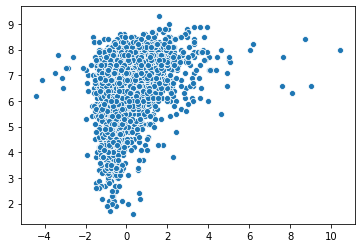

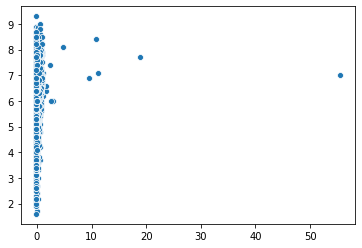

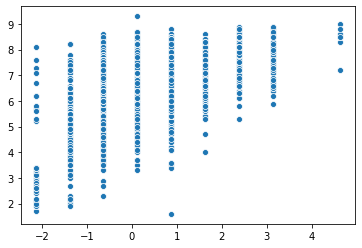

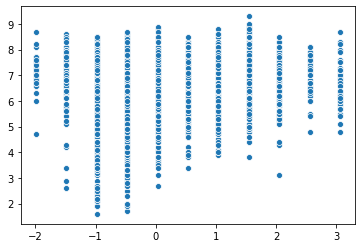

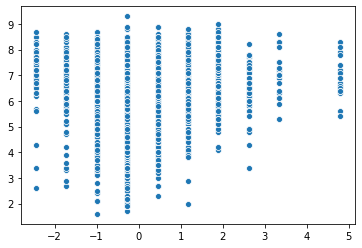

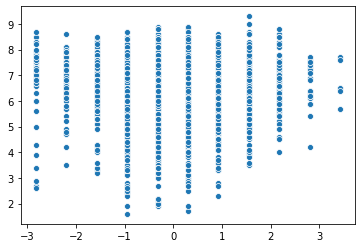

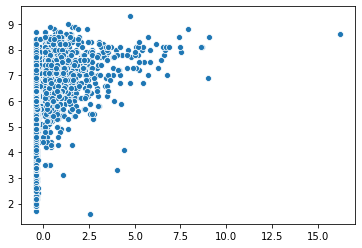

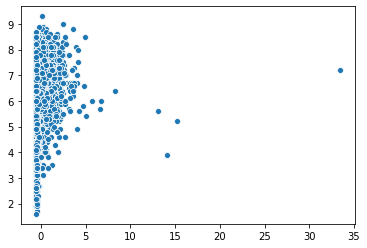

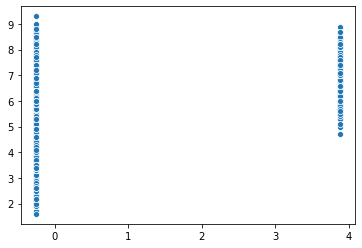

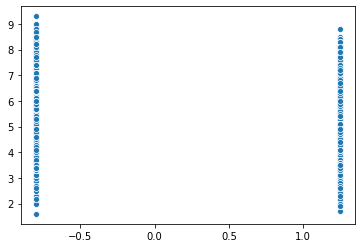

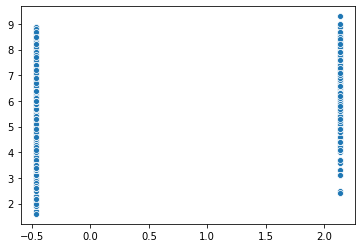

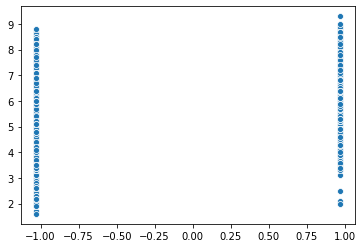

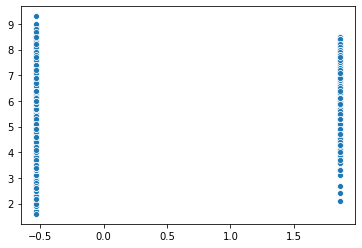

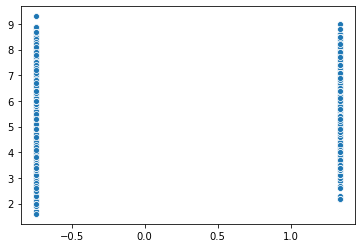

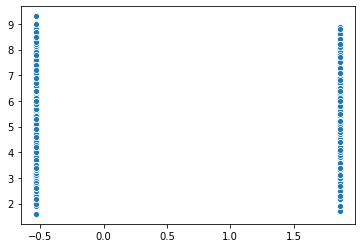

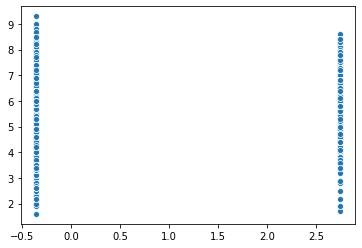

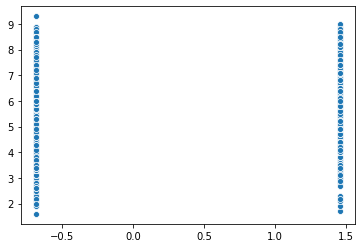

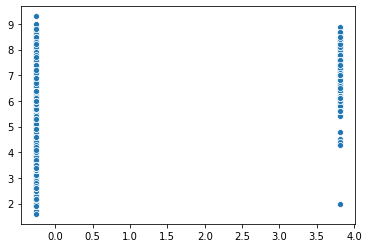

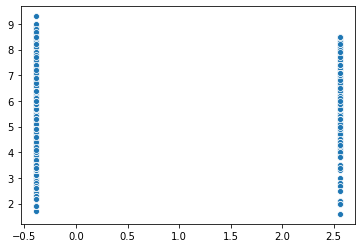

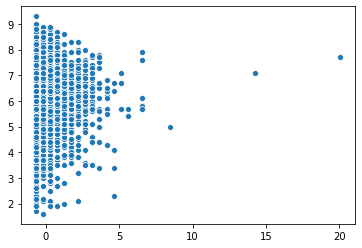

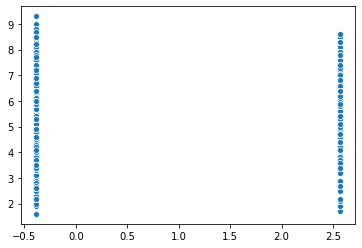

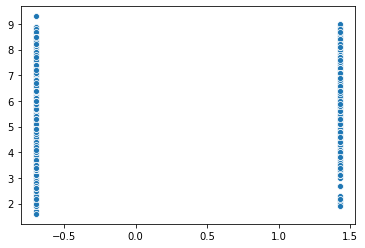

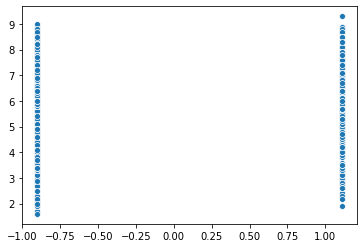

In [174]:
for x in normed_X.columns:
    sns.scatterplot(list(normed_X[x]), np.array(y1).reshape(y1.shape[0],))
    plt.show()

In [121]:
normed_X

,Action_Adventure,Biography,Comedy,Crime,Drama,Family_Animation,History_War,Mystery_Thriller_Horror,Others,Romance,...,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,director_facebook_likes,director_rank,duration,facenumber_in_poster,movie_facebook_likes
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0035423,-0.685103,-0.257681,1.231208,-0.47204,-1.001754,-0.365406,-0.243712,-0.758591,-0.393764,1.870901,...,1.391451,-0.906853,NaN,NaN,NaN,NaN,NaN,0.749236,-0.202589,-0.417678
tt0080487,-0.685103,-0.257681,1.231208,-0.47204,-1.001754,-0.365406,-0.243712,-0.758591,2.538908,-0.534358,...,-0.718480,1.102417,NaN,NaN,NaN,NaN,NaN,-0.470743,0.752787,-0.417678
tt0080549,-0.685103,3.879719,-0.811991,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,2.538908,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,0.798035,-0.680278,-0.417678
tt0080661,-0.685103,-0.257681,-0.811991,-0.47204,-1.001754,-0.365406,-0.243712,1.317877,-0.393764,1.870901,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,-0.177948,-0.680278,-0.417678
tt0080678,-0.685103,3.879719,-0.811991,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,-0.393764,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,0.798035,-0.202589,0.001327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt4733536,1.459241,-0.257681,1.231208,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,-0.393764,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,-1.056332,0.275099,-0.392118
tt4786282,-0.685103,-0.257681,-0.811991,-0.47204,-1.001754,-0.365406,-0.243712,1.317877,-0.393764,-0.534358,...,1.391451,-0.906853,NaN,NaN,NaN,NaN,NaN,-1.300328,-0.680278,-0.417678
tt4824308,-0.685103,-0.257681,-0.811991,-0.47204,0.997980,-0.365406,-0.243712,-0.758591,-0.393764,-0.534358,...,-0.718480,-0.906853,NaN,NaN,NaN,NaN,NaN,0.602839,4.574295,-0.417678


In [175]:
model = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
#     tfkl.Dense(64, activation='selu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])
model.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=700, workers=10, use_multiprocessing=True)

Train on 2125 samples, validate on 532 samples
Epoch 1/700
2125/2125 [==============================] - 0s 201us/sample - loss: 42.4040 - mse: 42.4040 - mae: 6.2786 - val_loss: 41.1109 - val_mse: 41.1109 - val_mae: 6.2317
Epoch 2/700
2125/2125 [==============================] - 0s 24us/sample - loss: 38.6214 - mse: 38.6213 - mae: 6.0601 - val_loss: 37.9484 - val_mse: 37.9484 - val_mae: 6.0222
Epoch 3/700
2125/2125 [==============================] - 0s 25us/sample - loss: 35.4005 - mse: 35.4005 - mae: 5.8263 - val_loss: 34.8482 - val_mse: 34.8482 - val_mae: 5.7830
Epoch 4/700
2125/2125 [==============================] - 0s 25us/sample - loss: 32.1959 - mse: 32.1959 - mae: 5.5572 - val_loss: 31.5697 - val_mse: 31.5697 - val_mae: 5.4997
Epoch 5/700
2125/2125 [==============================] - 0s 22us/sample - loss: 28.7396 - mse: 28.7396 - mae: 5.2470 - val_loss: 27.8479 - val_mse: 27.8479 - val_mae: 5.1612
Epoch 6/700
2125/2125 [==============================] - 0s 23us/sample - loss: 25

2125/2125 [==============================] - 0s 25us/sample - loss: 0.7321 - mse: 0.7321 - mae: 0.6559 - val_loss: 0.7603 - val_mse: 0.7603 - val_mae: 0.6778
Epoch 49/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.7250 - mse: 0.7250 - mae: 0.6522 - val_loss: 0.7536 - val_mse: 0.7536 - val_mae: 0.6779
Epoch 50/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.7187 - mse: 0.7187 - mae: 0.6494 - val_loss: 0.7382 - val_mse: 0.7382 - val_mae: 0.6694
Epoch 51/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.7122 - mse: 0.7122 - mae: 0.6467 - val_loss: 0.7471 - val_mse: 0.7471 - val_mae: 0.6724
Epoch 52/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.7079 - mse: 0.7079 - mae: 0.6429 - val_loss: 0.7326 - val_mse: 0.7326 - val_mae: 0.6685
Epoch 53/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.6992 - mse: 0.6992 - mae: 0.6393 - val_loss: 0.7246 - val_mse: 0.7246 - val

Epoch 96/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.5767 - mse: 0.5767 - mae: 0.5780 - val_loss: 0.6259 - val_mse: 0.6259 - val_mae: 0.6146
Epoch 97/700
2125/2125 [==============================] - 0s 35us/sample - loss: 0.5715 - mse: 0.5715 - mae: 0.5731 - val_loss: 0.6204 - val_mse: 0.6204 - val_mae: 0.6154
Epoch 98/700
2125/2125 [==============================] - 0s 48us/sample - loss: 0.5721 - mse: 0.5721 - mae: 0.5753 - val_loss: 0.6220 - val_mse: 0.6220 - val_mae: 0.6152
Epoch 99/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.5706 - mse: 0.5706 - mae: 0.5717 - val_loss: 0.6208 - val_mse: 0.6208 - val_mae: 0.6131
Epoch 100/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.5641 - mse: 0.5641 - mae: 0.5699 - val_loss: 0.6208 - val_mse: 0.6208 - val_mae: 0.6161
Epoch 101/700
2125/2125 [==============================] - 0s 27us/sample - loss: 0.5669 - mse: 0.5669 - mae: 0.5701 - val_loss: 0.6165 - val_ms

Epoch 144/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.5031 - mse: 0.5031 - mae: 0.5348 - val_loss: 0.5935 - val_mse: 0.5935 - val_mae: 0.6002
Epoch 145/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.5012 - mse: 0.5012 - mae: 0.5350 - val_loss: 0.5934 - val_mse: 0.5934 - val_mae: 0.6002
Epoch 146/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.4985 - mse: 0.4985 - mae: 0.5335 - val_loss: 0.5968 - val_mse: 0.5968 - val_mae: 0.6037
Epoch 147/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4982 - mse: 0.4982 - mae: 0.5346 - val_loss: 0.5948 - val_mse: 0.5948 - val_mae: 0.6026
Epoch 148/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.4959 - mse: 0.4959 - mae: 0.5345 - val_loss: 0.5986 - val_mse: 0.5986 - val_mae: 0.6012
Epoch 149/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.4981 - mse: 0.4981 - mae: 0.5325 - val_loss: 0.5894 - va

2125/2125 [==============================] - 0s 21us/sample - loss: 0.4647 - mse: 0.4647 - mae: 0.5156 - val_loss: 0.5902 - val_mse: 0.5902 - val_mae: 0.5970
Epoch 192/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4652 - mse: 0.4652 - mae: 0.5152 - val_loss: 0.5954 - val_mse: 0.5954 - val_mae: 0.6067
Epoch 193/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.4662 - mse: 0.4662 - mae: 0.5159 - val_loss: 0.6022 - val_mse: 0.6022 - val_mae: 0.6124
Epoch 194/700
2125/2125 [==============================] - 0s 32us/sample - loss: 0.4636 - mse: 0.4636 - mae: 0.5142 - val_loss: 0.5905 - val_mse: 0.5905 - val_mae: 0.5984
Epoch 195/700
2125/2125 [==============================] - 0s 25us/sample - loss: 0.4603 - mse: 0.4603 - mae: 0.5139 - val_loss: 0.5912 - val_mse: 0.5912 - val_mae: 0.6023
Epoch 196/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.4648 - mse: 0.4648 - mae: 0.5133 - val_loss: 0.5986 - val_mse: 0.5986 

Epoch 239/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.4434 - mse: 0.4434 - mae: 0.5032 - val_loss: 0.5981 - val_mse: 0.5981 - val_mae: 0.6044
Epoch 240/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.4439 - mse: 0.4439 - mae: 0.5046 - val_loss: 0.5960 - val_mse: 0.5960 - val_mae: 0.6039
Epoch 241/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.4441 - mse: 0.4441 - mae: 0.5032 - val_loss: 0.6051 - val_mse: 0.6051 - val_mae: 0.6104
Epoch 242/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.4437 - mse: 0.4437 - mae: 0.5012 - val_loss: 0.5915 - val_mse: 0.5915 - val_mae: 0.6017
Epoch 243/700
2125/2125 [==============================] - 0s 31us/sample - loss: 0.4388 - mse: 0.4388 - mae: 0.5015 - val_loss: 0.5972 - val_mse: 0.5972 - val_mae: 0.6026
Epoch 244/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.4417 - mse: 0.4417 - mae: 0.5029 - val_loss: 0.5982 - va

2125/2125 [==============================] - 0s 22us/sample - loss: 0.4319 - mse: 0.4319 - mae: 0.4986 - val_loss: 0.6083 - val_mse: 0.6083 - val_mae: 0.6111
Epoch 287/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4306 - mse: 0.4306 - mae: 0.4966 - val_loss: 0.5971 - val_mse: 0.5971 - val_mae: 0.6033
Epoch 288/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4315 - mse: 0.4315 - mae: 0.4985 - val_loss: 0.5994 - val_mse: 0.5994 - val_mae: 0.6050
Epoch 289/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4297 - mse: 0.4297 - mae: 0.4973 - val_loss: 0.5992 - val_mse: 0.5992 - val_mae: 0.6035
Epoch 290/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4276 - mse: 0.4276 - mae: 0.4959 - val_loss: 0.5966 - val_mse: 0.5966 - val_mae: 0.6025
Epoch 291/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.4301 - mse: 0.4301 - mae: 0.4968 - val_loss: 0.6056 - val_mse: 0.6056 

Epoch 334/700
2125/2125 [==============================] - 0s 25us/sample - loss: 0.4186 - mse: 0.4186 - mae: 0.4915 - val_loss: 0.5983 - val_mse: 0.5983 - val_mae: 0.6013
Epoch 335/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4174 - mse: 0.4174 - mae: 0.4886 - val_loss: 0.5986 - val_mse: 0.5986 - val_mae: 0.6056
Epoch 336/700
2125/2125 [==============================] - 0s 30us/sample - loss: 0.4160 - mse: 0.4160 - mae: 0.4877 - val_loss: 0.6022 - val_mse: 0.6022 - val_mae: 0.6094
Epoch 337/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.4132 - mse: 0.4132 - mae: 0.4872 - val_loss: 0.6075 - val_mse: 0.6075 - val_mae: 0.6121
Epoch 338/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.4115 - mse: 0.4115 - mae: 0.4852 - val_loss: 0.6014 - val_mse: 0.6014 - val_mae: 0.6084
Epoch 339/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.4228 - mse: 0.4228 - mae: 0.4933 - val_loss: 0.6015 - va

2125/2125 [==============================] - 0s 20us/sample - loss: 0.4061 - mse: 0.4061 - mae: 0.4833 - val_loss: 0.6037 - val_mse: 0.6037 - val_mae: 0.6081
Epoch 382/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.4033 - mse: 0.4033 - mae: 0.4808 - val_loss: 0.5995 - val_mse: 0.5995 - val_mae: 0.6065
Epoch 383/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.4080 - mse: 0.4080 - mae: 0.4833 - val_loss: 0.6122 - val_mse: 0.6122 - val_mae: 0.6124
Epoch 384/700
2125/2125 [==============================] - 0s 19us/sample - loss: 0.4037 - mse: 0.4037 - mae: 0.4822 - val_loss: 0.5989 - val_mse: 0.5989 - val_mae: 0.6050
Epoch 385/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.4027 - mse: 0.4027 - mae: 0.4834 - val_loss: 0.6117 - val_mse: 0.6117 - val_mae: 0.6063
Epoch 386/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.4019 - mse: 0.4019 - mae: 0.4781 - val_loss: 0.6105 - val_mse: 0.6105 

Epoch 429/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3955 - mse: 0.3955 - mae: 0.4779 - val_loss: 0.6042 - val_mse: 0.6042 - val_mae: 0.6057
Epoch 430/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3920 - mse: 0.3920 - mae: 0.4758 - val_loss: 0.6014 - val_mse: 0.6014 - val_mae: 0.6029
Epoch 431/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3961 - mse: 0.3961 - mae: 0.4770 - val_loss: 0.6150 - val_mse: 0.6150 - val_mae: 0.6120
Epoch 432/700
2125/2125 [==============================] - 0s 21us/sample - loss: 0.3948 - mse: 0.3948 - mae: 0.4774 - val_loss: 0.6116 - val_mse: 0.6116 - val_mae: 0.6115
Epoch 433/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.3928 - mse: 0.3928 - mae: 0.4745 - val_loss: 0.6070 - val_mse: 0.6070 - val_mae: 0.6047
Epoch 434/700
2125/2125 [==============================] - 0s 23us/sample - loss: 0.3960 - mse: 0.3960 - mae: 0.4786 - val_loss: 0.6207 - va

2125/2125 [==============================] - 0s 21us/sample - loss: 0.3893 - mse: 0.3893 - mae: 0.4729 - val_loss: 0.6126 - val_mse: 0.6126 - val_mae: 0.6084
Epoch 477/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3854 - mse: 0.3854 - mae: 0.4706 - val_loss: 0.6077 - val_mse: 0.6077 - val_mae: 0.6058
Epoch 478/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.3883 - mse: 0.3883 - mae: 0.4751 - val_loss: 0.6164 - val_mse: 0.6164 - val_mae: 0.6072
Epoch 479/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3850 - mse: 0.3850 - mae: 0.4683 - val_loss: 0.6130 - val_mse: 0.6130 - val_mae: 0.6118
Epoch 480/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3860 - mse: 0.3860 - mae: 0.4726 - val_loss: 0.6085 - val_mse: 0.6085 - val_mae: 0.6055
Epoch 481/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3863 - mse: 0.3863 - mae: 0.4706 - val_loss: 0.6146 - val_mse: 0.6146 

Epoch 524/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.3821 - mse: 0.3821 - mae: 0.4677 - val_loss: 0.6102 - val_mse: 0.6102 - val_mae: 0.6056
Epoch 525/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3764 - mse: 0.3764 - mae: 0.4638 - val_loss: 0.6227 - val_mse: 0.6227 - val_mae: 0.6123
Epoch 526/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3808 - mse: 0.3808 - mae: 0.4685 - val_loss: 0.6115 - val_mse: 0.6115 - val_mae: 0.6104
Epoch 527/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3801 - mse: 0.3801 - mae: 0.4659 - val_loss: 0.6210 - val_mse: 0.6210 - val_mae: 0.6151
Epoch 528/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3808 - mse: 0.3808 - mae: 0.4675 - val_loss: 0.6114 - val_mse: 0.6114 - val_mae: 0.6058
Epoch 529/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3794 - mse: 0.3794 - mae: 0.4676 - val_loss: 0.6096 - va

2125/2125 [==============================] - 0s 20us/sample - loss: 0.3737 - mse: 0.3737 - mae: 0.4647 - val_loss: 0.6119 - val_mse: 0.6119 - val_mae: 0.6055
Epoch 572/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3715 - mse: 0.3715 - mae: 0.4625 - val_loss: 0.6327 - val_mse: 0.6327 - val_mae: 0.6160
Epoch 573/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3750 - mse: 0.3750 - mae: 0.4635 - val_loss: 0.6141 - val_mse: 0.6141 - val_mae: 0.6071
Epoch 574/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3729 - mse: 0.3729 - mae: 0.4637 - val_loss: 0.6301 - val_mse: 0.6301 - val_mae: 0.6214
Epoch 575/700
2125/2125 [==============================] - 0s 20us/sample - loss: 0.3716 - mse: 0.3716 - mae: 0.4622 - val_loss: 0.6069 - val_mse: 0.6069 - val_mae: 0.6017
Epoch 576/700
2125/2125 [==============================] - 0s 22us/sample - loss: 0.3756 - mse: 0.3756 - mae: 0.4655 - val_loss: 0.6208 - val_mse: 0.6208 

Epoch 619/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.3710 - mse: 0.3710 - mae: 0.4618 - val_loss: 0.6146 - val_mse: 0.6146 - val_mae: 0.6080
Epoch 620/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3676 - mse: 0.3676 - mae: 0.4580 - val_loss: 0.6243 - val_mse: 0.6243 - val_mae: 0.6137
Epoch 621/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3708 - mse: 0.3708 - mae: 0.4624 - val_loss: 0.6143 - val_mse: 0.6143 - val_mae: 0.6027
Epoch 622/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3674 - mse: 0.3674 - mae: 0.4609 - val_loss: 0.6269 - val_mse: 0.6269 - val_mae: 0.6127
Epoch 623/700
2125/2125 [==============================] - 0s 27us/sample - loss: 0.3652 - mse: 0.3652 - mae: 0.4594 - val_loss: 0.6278 - val_mse: 0.6278 - val_mae: 0.6143
Epoch 624/700
2125/2125 [==============================] - 0s 29us/sample - loss: 0.3717 - mse: 0.3717 - mae: 0.4622 - val_loss: 0.6217 - va

2125/2125 [==============================] - 0s 50us/sample - loss: 0.3688 - mse: 0.3688 - mae: 0.4612 - val_loss: 0.6265 - val_mse: 0.6265 - val_mae: 0.6123
Epoch 667/700
2125/2125 [==============================] - 0s 26us/sample - loss: 0.3673 - mse: 0.3673 - mae: 0.4593 - val_loss: 0.6190 - val_mse: 0.6190 - val_mae: 0.6123
Epoch 668/700
2125/2125 [==============================] - 0s 28us/sample - loss: 0.3623 - mse: 0.3623 - mae: 0.4579 - val_loss: 0.6241 - val_mse: 0.6241 - val_mae: 0.6109
Epoch 669/700
2125/2125 [==============================] - 0s 24us/sample - loss: 0.3620 - mse: 0.3620 - mae: 0.4560 - val_loss: 0.6339 - val_mse: 0.6339 - val_mae: 0.6144
Epoch 670/700
2125/2125 [==============================] - 0s 42us/sample - loss: 0.3603 - mse: 0.3603 - mae: 0.4564 - val_loss: 0.6333 - val_mse: 0.6333 - val_mae: 0.6166
Epoch 671/700
2125/2125 [==============================] - 0s 50us/sample - loss: 0.3621 - mse: 0.3621 - mae: 0.4579 - val_loss: 0.6199 - val_mse: 0.6199 

In [176]:
preds = model.predict(np.array(X_test)).flatten()

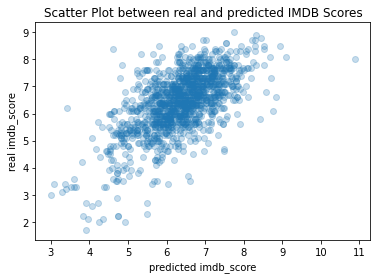

In [179]:
plt.scatter(preds, np.array(y_test).flatten(), alpha=0.25)
plt.ylabel("real imdb_score")
plt.xlabel("predicted imdb_score")
plt.title("Scatter Plot between real and predicted IMDB Scores", size=12)
plt.show()

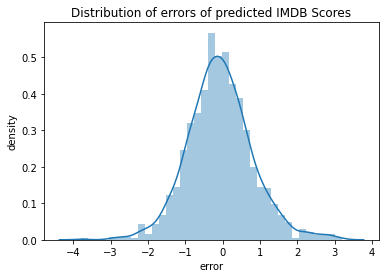

In [180]:
errors = preds - np.array(y_test).flatten()
sns.distplot(errors) # We expect the distribution to be normal around zero!
plt.title("Distribution of errors of predicted IMDB Scores", size=12)
plt.xlabel("error")
plt.ylabel("density")
plt.show()

In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

print(
    mean_squared_error(np.array(y_test), preds),
    mean_absolute_error(np.array(y_test), preds),
    explained_variance_score(np.array(y_test), preds),
    r2_score(np.array(y_test), preds)
)

0.7671210977915994 0.6703616141908673 0.38756391743018215 0.38406185707447693


### 3. Predict Profitability

#### 3.1. Traditional neural network predicting log profitability

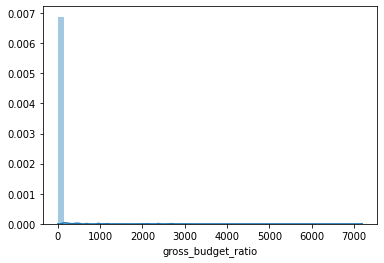

In [200]:
sns.distplot(df_prof["gross_budget_ratio"])

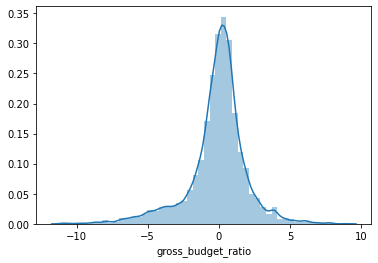

In [184]:
sns.distplot(np.log(df_prof["gross_budget_ratio"]))

In [212]:
df_cut = df_prof[df_prof.gross_budget_ratio < 5]
X_cut = df_cut.loc[:, ~df_cut.columns.isin(["gross_budget_ratio"])]
X_cut.shape, X.shape

((3446, 27), (3966, 23))

In [213]:
# not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
#               "num_user_for_reviews"]
X_cut_stats = X_cut.describe().transpose() 
normed_X_cut = norm(X_cut, X_cut_stats).reset_index(drop=True)
y2 = np.log(df_prof[df_prof["gross_budget_ratio"] < 5].gross_budget_ratio)

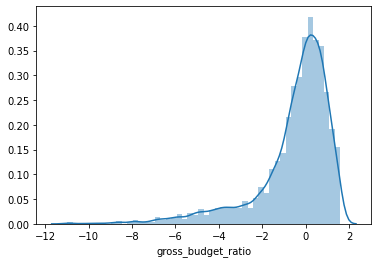

In [214]:
sns.distplot(y2)

In [215]:
# X remains the same, but labels are now y2
X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y2, test_size=0.33, random_state=42)

In [216]:
model2 = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
#     tfkl.Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
#     tfkl.Dense(64, activation='selu'),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])

model2.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model2.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=128, 
          epochs=1000, workers=10, use_multiprocessing=True)

Train on 1846 samples, validate on 462 samples
Epoch 1/1000
1846/1846 [==============================] - 0s 207us/sample - loss: 4.7111 - mse: 4.7111 - mae: 1.5167 - val_loss: 4.1839 - val_mse: 4.1839 - val_mae: 1.4911
Epoch 2/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 3.9213 - mse: 3.9213 - mae: 1.3775 - val_loss: 3.6635 - val_mse: 3.6635 - val_mae: 1.3947
Epoch 3/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 3.4444 - mse: 3.4444 - mae: 1.2920 - val_loss: 3.3929 - val_mse: 3.3929 - val_mae: 1.3287
Epoch 4/1000
1846/1846 [==============================] - 0s 26us/sample - loss: 3.1669 - mse: 3.1669 - mae: 1.2340 - val_loss: 3.2102 - val_mse: 3.2102 - val_mae: 1.2866
Epoch 5/1000
1846/1846 [==============================] - 0s 27us/sample - loss: 2.9896 - mse: 2.9896 - mae: 1.1997 - val_loss: 3.1094 - val_mse: 3.1094 - val_mae: 1.2603
Epoch 6/1000
1846/1846 [==============================] - 0s 26us/sample - loss: 2.8731 - mse: 2.

1846/1846 [==============================] - 0s 23us/sample - loss: 2.4861 - mse: 2.4861 - mae: 1.0947 - val_loss: 2.9359 - val_mse: 2.9359 - val_mae: 1.2192
Epoch 49/1000
1846/1846 [==============================] - 0s 27us/sample - loss: 2.4853 - mse: 2.4853 - mae: 1.0953 - val_loss: 2.9352 - val_mse: 2.9352 - val_mae: 1.2191
Epoch 50/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 2.4810 - mse: 2.4810 - mae: 1.0937 - val_loss: 2.9365 - val_mse: 2.9365 - val_mae: 1.2224
Epoch 51/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.4814 - mse: 2.4814 - mae: 1.0907 - val_loss: 2.9322 - val_mse: 2.9322 - val_mae: 1.2173
Epoch 52/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.4798 - mse: 2.4798 - mae: 1.0963 - val_loss: 2.9418 - val_mse: 2.9418 - val_mae: 1.2237
Epoch 53/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.4769 - mse: 2.4769 - mae: 1.0940 - val_loss: 2.9570 - val_mse: 2.9570 

Epoch 96/1000
1846/1846 [==============================] - 0s 26us/sample - loss: 2.3399 - mse: 2.3399 - mae: 1.0549 - val_loss: 2.9662 - val_mse: 2.9662 - val_mae: 1.2248
Epoch 97/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.3445 - mse: 2.3445 - mae: 1.0626 - val_loss: 2.9797 - val_mse: 2.9797 - val_mae: 1.2231
Epoch 98/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.3372 - mse: 2.3372 - mae: 1.0613 - val_loss: 2.9776 - val_mse: 2.9776 - val_mae: 1.2282
Epoch 99/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.3362 - mse: 2.3362 - mae: 1.0578 - val_loss: 2.9734 - val_mse: 2.9734 - val_mae: 1.2250
Epoch 100/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.3338 - mse: 2.3338 - mae: 1.0596 - val_loss: 2.9779 - val_mse: 2.9779 - val_mae: 1.2288
Epoch 101/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.3258 - mse: 2.3258 - mae: 1.0587 - val_loss: 2.9853 - 

1846/1846 [==============================] - 0s 22us/sample - loss: 2.2148 - mse: 2.2148 - mae: 1.0328 - val_loss: 3.0391 - val_mse: 3.0391 - val_mae: 1.2406
Epoch 144/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.2127 - mse: 2.2127 - mae: 1.0326 - val_loss: 3.0400 - val_mse: 3.0400 - val_mae: 1.2397
Epoch 145/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 2.2096 - mse: 2.2096 - mae: 1.0315 - val_loss: 3.0327 - val_mse: 3.0327 - val_mae: 1.2392
Epoch 146/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 2.2089 - mse: 2.2089 - mae: 1.0293 - val_loss: 3.0395 - val_mse: 3.0395 - val_mae: 1.2374
Epoch 147/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 2.2045 - mse: 2.2045 - mae: 1.0283 - val_loss: 3.0367 - val_mse: 3.0367 - val_mae: 1.2385
Epoch 148/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 2.2014 - mse: 2.2014 - mae: 1.0273 - val_loss: 3.0275 - val_mse: 3.

1846/1846 [==============================] - 0s 23us/sample - loss: 2.0969 - mse: 2.0969 - mae: 1.0076 - val_loss: 3.0881 - val_mse: 3.0881 - val_mae: 1.2556
Epoch 191/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 2.1027 - mse: 2.1027 - mae: 1.0031 - val_loss: 3.0816 - val_mse: 3.0816 - val_mae: 1.2536
Epoch 192/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.1006 - mse: 2.1006 - mae: 1.0085 - val_loss: 3.0813 - val_mse: 3.0813 - val_mae: 1.2544
Epoch 193/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.1030 - mse: 2.1030 - mae: 1.0078 - val_loss: 3.1244 - val_mse: 3.1244 - val_mae: 1.2590
Epoch 194/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.1030 - mse: 2.1030 - mae: 1.0074 - val_loss: 3.0930 - val_mse: 3.0930 - val_mae: 1.2522
Epoch 195/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 2.0909 - mse: 2.0909 - mae: 1.0031 - val_loss: 3.0932 - val_mse: 3.

1846/1846 [==============================] - 0s 23us/sample - loss: 2.0118 - mse: 2.0118 - mae: 0.9866 - val_loss: 3.1502 - val_mse: 3.1502 - val_mae: 1.2724
Epoch 238/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 2.0062 - mse: 2.0062 - mae: 0.9871 - val_loss: 3.1453 - val_mse: 3.1453 - val_mae: 1.2736
Epoch 239/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 2.0034 - mse: 2.0034 - mae: 0.9829 - val_loss: 3.1462 - val_mse: 3.1462 - val_mae: 1.2663
Epoch 240/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 2.0092 - mse: 2.0092 - mae: 0.9814 - val_loss: 3.1425 - val_mse: 3.1425 - val_mae: 1.2696
Epoch 241/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 2.0006 - mse: 2.0006 - mae: 0.9836 - val_loss: 3.1516 - val_mse: 3.1516 - val_mae: 1.2752
Epoch 242/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 2.0061 - mse: 2.0061 - mae: 0.9866 - val_loss: 3.1524 - val_mse: 3.

1846/1846 [==============================] - 0s 26us/sample - loss: 1.9357 - mse: 1.9357 - mae: 0.9664 - val_loss: 3.1784 - val_mse: 3.1784 - val_mae: 1.2838
Epoch 285/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.9362 - mse: 1.9362 - mae: 0.9685 - val_loss: 3.1808 - val_mse: 3.1808 - val_mae: 1.2819
Epoch 286/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.9332 - mse: 1.9332 - mae: 0.9710 - val_loss: 3.2049 - val_mse: 3.2049 - val_mae: 1.2854
Epoch 287/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.9350 - mse: 1.9350 - mae: 0.9654 - val_loss: 3.1869 - val_mse: 3.1869 - val_mae: 1.2811
Epoch 288/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.9313 - mse: 1.9313 - mae: 0.9660 - val_loss: 3.1793 - val_mse: 3.1793 - val_mae: 1.2852
Epoch 289/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.9278 - mse: 1.9278 - mae: 0.9673 - val_loss: 3.1836 - val_mse: 3.

1846/1846 [==============================] - 0s 20us/sample - loss: 1.8857 - mse: 1.8857 - mae: 0.9644 - val_loss: 3.2389 - val_mse: 3.2389 - val_mae: 1.2960
Epoch 332/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.8799 - mse: 1.8799 - mae: 0.9523 - val_loss: 3.2364 - val_mse: 3.2364 - val_mae: 1.2929
Epoch 333/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.8741 - mse: 1.8741 - mae: 0.9512 - val_loss: 3.2269 - val_mse: 3.2269 - val_mae: 1.2951
Epoch 334/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.8707 - mse: 1.8707 - mae: 0.9524 - val_loss: 3.2315 - val_mse: 3.2315 - val_mae: 1.2896
Epoch 335/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.8740 - mse: 1.8740 - mae: 0.9467 - val_loss: 3.2289 - val_mse: 3.2289 - val_mae: 1.2903
Epoch 336/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.8665 - mse: 1.8665 - mae: 0.9447 - val_loss: 3.2382 - val_mse: 3.

1846/1846 [==============================] - 0s 19us/sample - loss: 1.8273 - mse: 1.8273 - mae: 0.9378 - val_loss: 3.2658 - val_mse: 3.2658 - val_mae: 1.3043
Epoch 379/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.8349 - mse: 1.8349 - mae: 0.9505 - val_loss: 3.2801 - val_mse: 3.2801 - val_mae: 1.3116
Epoch 380/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.8238 - mse: 1.8238 - mae: 0.9437 - val_loss: 3.2679 - val_mse: 3.2679 - val_mae: 1.3099
Epoch 381/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.8301 - mse: 1.8301 - mae: 0.9435 - val_loss: 3.2810 - val_mse: 3.2810 - val_mae: 1.3053
Epoch 382/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.8306 - mse: 1.8306 - mae: 0.9429 - val_loss: 3.2635 - val_mse: 3.2635 - val_mae: 1.3058
Epoch 383/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.8300 - mse: 1.8300 - mae: 0.9417 - val_loss: 3.2764 - val_mse: 3.

1846/1846 [==============================] - 0s 19us/sample - loss: 1.7832 - mse: 1.7832 - mae: 0.9377 - val_loss: 3.3223 - val_mse: 3.3223 - val_mae: 1.3152
Epoch 426/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.7923 - mse: 1.7923 - mae: 0.9288 - val_loss: 3.3115 - val_mse: 3.3115 - val_mae: 1.3162
Epoch 427/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7857 - mse: 1.7857 - mae: 0.9367 - val_loss: 3.3225 - val_mse: 3.3225 - val_mae: 1.3227
Epoch 428/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.7827 - mse: 1.7827 - mae: 0.9333 - val_loss: 3.3051 - val_mse: 3.3051 - val_mae: 1.3172
Epoch 429/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7821 - mse: 1.7821 - mae: 0.9349 - val_loss: 3.3379 - val_mse: 3.3379 - val_mae: 1.3142
Epoch 430/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7943 - mse: 1.7943 - mae: 0.9360 - val_loss: 3.3321 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.7435 - mse: 1.7435 - mae: 0.9241 - val_loss: 3.3437 - val_mse: 3.3437 - val_mae: 1.3247
Epoch 473/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7466 - mse: 1.7466 - mae: 0.9262 - val_loss: 3.3607 - val_mse: 3.3607 - val_mae: 1.3289
Epoch 474/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.7522 - mse: 1.7522 - mae: 0.9298 - val_loss: 3.3719 - val_mse: 3.3719 - val_mae: 1.3320
Epoch 475/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7443 - mse: 1.7443 - mae: 0.9235 - val_loss: 3.3502 - val_mse: 3.3502 - val_mae: 1.3225
Epoch 476/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.7482 - mse: 1.7482 - mae: 0.9249 - val_loss: 3.3546 - val_mse: 3.3546 - val_mae: 1.3234
Epoch 477/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.7412 - mse: 1.7412 - mae: 0.9194 - val_loss: 3.3643 - val_mse: 3.

1846/1846 [==============================] - 0s 19us/sample - loss: 1.7179 - mse: 1.7179 - mae: 0.9160 - val_loss: 3.3963 - val_mse: 3.3963 - val_mae: 1.3359
Epoch 520/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.7163 - mse: 1.7163 - mae: 0.9141 - val_loss: 3.4060 - val_mse: 3.4060 - val_mae: 1.3337
Epoch 521/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.7238 - mse: 1.7238 - mae: 0.9281 - val_loss: 3.4114 - val_mse: 3.4114 - val_mae: 1.3403
Epoch 522/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.7063 - mse: 1.7063 - mae: 0.9173 - val_loss: 3.4109 - val_mse: 3.4109 - val_mae: 1.3385
Epoch 523/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.7109 - mse: 1.7109 - mae: 0.9145 - val_loss: 3.4041 - val_mse: 3.4041 - val_mae: 1.3332
Epoch 524/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.7146 - mse: 1.7146 - mae: 0.9171 - val_loss: 3.4121 - val_mse: 3.

1846/1846 [==============================] - 0s 22us/sample - loss: 1.6821 - mse: 1.6821 - mae: 0.9102 - val_loss: 3.4361 - val_mse: 3.4361 - val_mae: 1.3417
Epoch 567/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6839 - mse: 1.6839 - mae: 0.9071 - val_loss: 3.4444 - val_mse: 3.4444 - val_mae: 1.3485
Epoch 568/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.6919 - mse: 1.6919 - mae: 0.9121 - val_loss: 3.4504 - val_mse: 3.4504 - val_mae: 1.3396
Epoch 569/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6934 - mse: 1.6934 - mae: 0.9146 - val_loss: 3.4571 - val_mse: 3.4571 - val_mae: 1.3484
Epoch 570/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.7089 - mse: 1.7089 - mae: 0.9201 - val_loss: 3.4308 - val_mse: 3.4308 - val_mae: 1.3486
Epoch 571/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.6860 - mse: 1.6860 - mae: 0.9098 - val_loss: 3.4439 - val_mse: 3.

1846/1846 [==============================] - 0s 22us/sample - loss: 1.6645 - mse: 1.6645 - mae: 0.9039 - val_loss: 3.4729 - val_mse: 3.4729 - val_mae: 1.3492
Epoch 614/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.6625 - mse: 1.6625 - mae: 0.9060 - val_loss: 3.4801 - val_mse: 3.4801 - val_mae: 1.3535
Epoch 615/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.6669 - mse: 1.6669 - mae: 0.9040 - val_loss: 3.4719 - val_mse: 3.4719 - val_mae: 1.3626
Epoch 616/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.6551 - mse: 1.6551 - mae: 0.9041 - val_loss: 3.4840 - val_mse: 3.4840 - val_mae: 1.3509
Epoch 617/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6587 - mse: 1.6587 - mae: 0.9073 - val_loss: 3.4898 - val_mse: 3.4898 - val_mae: 1.3548
Epoch 618/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6585 - mse: 1.6585 - mae: 0.9052 - val_loss: 3.4678 - val_mse: 3.

1846/1846 [==============================] - 0s 26us/sample - loss: 1.6498 - mse: 1.6498 - mae: 0.9014 - val_loss: 3.4909 - val_mse: 3.4909 - val_mae: 1.3642
Epoch 661/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.6458 - mse: 1.6458 - mae: 0.9050 - val_loss: 3.5105 - val_mse: 3.5105 - val_mae: 1.3586
Epoch 662/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6527 - mse: 1.6527 - mae: 0.9038 - val_loss: 3.5362 - val_mse: 3.5362 - val_mae: 1.3606
Epoch 663/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6442 - mse: 1.6442 - mae: 0.9027 - val_loss: 3.4989 - val_mse: 3.4989 - val_mae: 1.3595
Epoch 664/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6295 - mse: 1.6295 - mae: 0.8930 - val_loss: 3.5057 - val_mse: 3.5057 - val_mae: 1.3673
Epoch 665/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6348 - mse: 1.6348 - mae: 0.9002 - val_loss: 3.5116 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.6125 - mse: 1.6125 - mae: 0.8954 - val_loss: 3.5345 - val_mse: 3.5345 - val_mae: 1.3701
Epoch 708/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.6189 - mse: 1.6189 - mae: 0.8972 - val_loss: 3.5476 - val_mse: 3.5476 - val_mae: 1.3731
Epoch 709/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.6169 - mse: 1.6169 - mae: 0.8903 - val_loss: 3.5539 - val_mse: 3.5539 - val_mae: 1.3703
Epoch 710/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.6183 - mse: 1.6183 - mae: 0.9058 - val_loss: 3.5595 - val_mse: 3.5595 - val_mae: 1.3794
Epoch 711/1000
1846/1846 [==============================] - 0s 18us/sample - loss: 1.6153 - mse: 1.6153 - mae: 0.8863 - val_loss: 3.5420 - val_mse: 3.5420 - val_mae: 1.3779
Epoch 712/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6139 - mse: 1.6139 - mae: 0.8992 - val_loss: 3.5639 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.5980 - mse: 1.5980 - mae: 0.8897 - val_loss: 3.5733 - val_mse: 3.5733 - val_mae: 1.3769
Epoch 755/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.6088 - mse: 1.6088 - mae: 0.8925 - val_loss: 3.5918 - val_mse: 3.5918 - val_mae: 1.3759
Epoch 756/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.5929 - mse: 1.5929 - mae: 0.8868 - val_loss: 3.5669 - val_mse: 3.5669 - val_mae: 1.3810
Epoch 757/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5956 - mse: 1.5956 - mae: 0.8857 - val_loss: 3.5774 - val_mse: 3.5774 - val_mae: 1.3815
Epoch 758/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5888 - mse: 1.5888 - mae: 0.8881 - val_loss: 3.6079 - val_mse: 3.6079 - val_mae: 1.3864
Epoch 759/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5911 - mse: 1.5911 - mae: 0.8879 - val_loss: 3.5731 - val_mse: 3.

1846/1846 [==============================] - 0s 22us/sample - loss: 1.5751 - mse: 1.5751 - mae: 0.8808 - val_loss: 3.5928 - val_mse: 3.5928 - val_mae: 1.3840
Epoch 802/1000
1846/1846 [==============================] - 0s 30us/sample - loss: 1.5712 - mse: 1.5712 - mae: 0.8878 - val_loss: 3.5883 - val_mse: 3.5883 - val_mae: 1.3892
Epoch 803/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.5691 - mse: 1.5691 - mae: 0.8814 - val_loss: 3.6017 - val_mse: 3.6017 - val_mae: 1.3822
Epoch 804/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.5702 - mse: 1.5702 - mae: 0.8814 - val_loss: 3.5908 - val_mse: 3.5908 - val_mae: 1.3854
Epoch 805/1000
1846/1846 [==============================] - 0s 26us/sample - loss: 1.5669 - mse: 1.5669 - mae: 0.8808 - val_loss: 3.5879 - val_mse: 3.5879 - val_mae: 1.3851
Epoch 806/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.5615 - mse: 1.5615 - mae: 0.8761 - val_loss: 3.5940 - val_mse: 3.

1846/1846 [==============================] - 0s 19us/sample - loss: 1.5677 - mse: 1.5677 - mae: 0.8910 - val_loss: 3.6009 - val_mse: 3.6009 - val_mae: 1.3857
Epoch 849/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.5478 - mse: 1.5478 - mae: 0.8796 - val_loss: 3.6048 - val_mse: 3.6048 - val_mae: 1.3797
Epoch 850/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5423 - mse: 1.5423 - mae: 0.8726 - val_loss: 3.6066 - val_mse: 3.6066 - val_mae: 1.3853
Epoch 851/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5449 - mse: 1.5449 - mae: 0.8757 - val_loss: 3.6179 - val_mse: 3.6179 - val_mae: 1.3887
Epoch 852/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5562 - mse: 1.5562 - mae: 0.8895 - val_loss: 3.6465 - val_mse: 3.6465 - val_mae: 1.3944
Epoch 853/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.5564 - mse: 1.5564 - mae: 0.8816 - val_loss: 3.6217 - val_mse: 3.

1846/1846 [==============================] - 0s 20us/sample - loss: 1.5314 - mse: 1.5314 - mae: 0.8743 - val_loss: 3.6293 - val_mse: 3.6293 - val_mae: 1.3842
Epoch 896/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.5246 - mse: 1.5246 - mae: 0.8735 - val_loss: 3.6592 - val_mse: 3.6592 - val_mae: 1.3899
Epoch 897/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.5262 - mse: 1.5262 - mae: 0.8724 - val_loss: 3.6481 - val_mse: 3.6481 - val_mae: 1.3909
Epoch 898/1000
1846/1846 [==============================] - 0s 29us/sample - loss: 1.5283 - mse: 1.5283 - mae: 0.8761 - val_loss: 3.6438 - val_mse: 3.6438 - val_mae: 1.3906
Epoch 899/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.5262 - mse: 1.5262 - mae: 0.8711 - val_loss: 3.6349 - val_mse: 3.6349 - val_mae: 1.3892
Epoch 900/1000
1846/1846 [==============================] - 0s 23us/sample - loss: 1.5253 - mse: 1.5253 - mae: 0.8770 - val_loss: 3.6728 - val_mse: 3.

1846/1846 [==============================] - 0s 22us/sample - loss: 1.5103 - mse: 1.5103 - mae: 0.8704 - val_loss: 3.6695 - val_mse: 3.6695 - val_mae: 1.3927
Epoch 943/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.5096 - mse: 1.5096 - mae: 0.8695 - val_loss: 3.6660 - val_mse: 3.6660 - val_mae: 1.3935
Epoch 944/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5179 - mse: 1.5179 - mae: 0.8696 - val_loss: 3.6694 - val_mse: 3.6694 - val_mae: 1.3938
Epoch 945/1000
1846/1846 [==============================] - 0s 20us/sample - loss: 1.5031 - mse: 1.5031 - mae: 0.8697 - val_loss: 3.6948 - val_mse: 3.6948 - val_mae: 1.3962
Epoch 946/1000
1846/1846 [==============================] - 0s 19us/sample - loss: 1.5182 - mse: 1.5182 - mae: 0.8735 - val_loss: 3.6907 - val_mse: 3.6907 - val_mae: 1.3919
Epoch 947/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.5137 - mse: 1.5137 - mae: 0.8681 - val_loss: 3.6614 - val_mse: 3.

1846/1846 [==============================] - 0s 21us/sample - loss: 1.4988 - mse: 1.4988 - mae: 0.8587 - val_loss: 3.6820 - val_mse: 3.6820 - val_mae: 1.3912
Epoch 990/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.5035 - mse: 1.5035 - mae: 0.8735 - val_loss: 3.6997 - val_mse: 3.6997 - val_mae: 1.4049
Epoch 991/1000
1846/1846 [==============================] - 0s 22us/sample - loss: 1.4997 - mse: 1.4997 - mae: 0.8658 - val_loss: 3.6962 - val_mse: 3.6962 - val_mae: 1.3932
Epoch 992/1000
1846/1846 [==============================] - 0s 25us/sample - loss: 1.5030 - mse: 1.5030 - mae: 0.8717 - val_loss: 3.6990 - val_mse: 3.6990 - val_mae: 1.4034
Epoch 993/1000
1846/1846 [==============================] - 0s 21us/sample - loss: 1.5096 - mse: 1.5096 - mae: 0.8686 - val_loss: 3.6939 - val_mse: 3.6939 - val_mae: 1.3975
Epoch 994/1000
1846/1846 [==============================] - 0s 24us/sample - loss: 1.4963 - mse: 1.4963 - mae: 0.8706 - val_loss: 3.6865 - val_mse: 3.

In [217]:
preds2 = model2.predict(X_test).flatten()

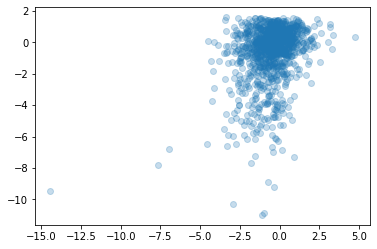

In [218]:
plt.scatter(preds2, np.array(y_test).flatten(), alpha=0.25)

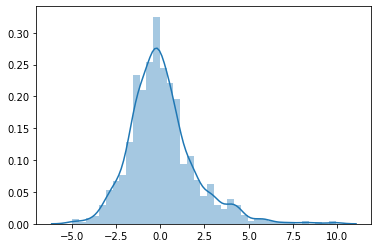

In [219]:
errors2 = preds2 - np.array(y_test).flatten()
sns.distplot(errors2) # We expect the distribution to be normal around zero!

In [220]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

print(
    mean_squared_error(np.array(y_test), preds2),
    mean_absolute_error(np.array(y_test), preds2),
    explained_variance_score(np.array(y_test), preds2),
    r2_score(np.array(y_test), preds2)
)

3.467271802043857 1.3516971030148548 -0.0474084439228013 -0.05030373779969266


#### 3.2. Probabilistic neural network predicting log profitability

In [103]:
from tensorflow_probability import layers as tfpl
from tensorflow_probability import distributions as tfd

In [104]:
model3 = tfk.Sequential([
    tfpl.DenseFlipout(32, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(1, activation='relu'),
    tfpl.DistributionLambda(make_distribution_fn=lambda t: tfd.Normal(
          loc=t, scale=1e-7 + tf.math.softplus(0.02 * t),
      ))
])

model3.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.KLDivergence(), metrics=[])
model3.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=150, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 1897 samples, validate on 475 samples
Epoch 1/500
1897/1897 [==============================] - 1s 660us/sample - loss: 1939.1933 - val_loss: 1933.4824
Epoch 2/500
1897/1897 [==============================] - 0s 31us/sample - loss: 1928.7669 - val_loss: 1923.2390
Epoch 3/500
1897/1897 [==============================] - 0s 29us/sample - loss: 1918.5284 - val_loss: 1912.7415
Epoch 4/500
1897/1897 [==============================] - 0s 32us/sample - loss: 1908.4307 - val_loss: 1903.0833
Epoch 5/500
1897/1897 [==============================] - 0s 27us/sample - loss: 1898.2357 - val_loss: 1892.9908
Epoch 6/500
1897/1897 [==============================] - 0s 28us/sample - loss: 1888.2334 - val_loss: 1882.7166
Epoch 7/500
1897/1897 [==============================] - 0s 31us/sample - loss: 1878.4037 - val_loss: 1872.8532
Epoch 8/500
1897/1897 [==============================] - 0s 28us/sample - loss: 1868.4954 - val_loss: 1862.9166
Epoch 9/500
1897/1897 [==============================] -

KeyboardInterrupt: 

In [34]:
preds3 = model3.predict(X_test).flatten()

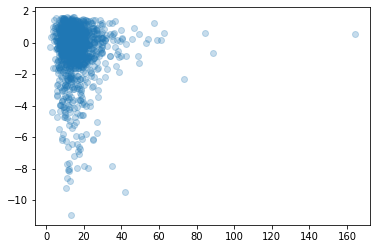

In [35]:
plt.scatter(preds3, np.array(y_test).flatten(), alpha=0.25)

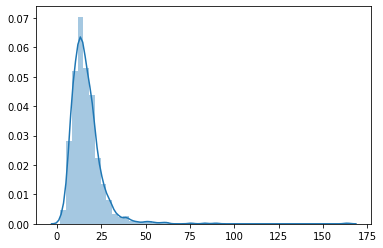

In [36]:
errors3 = preds3 - np.array(y_test).flatten()
sns.distplot(errors3)

#### 3.3 Traditional network with a classification problem instead

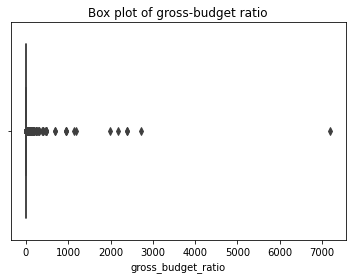

In [244]:
sns.boxplot(df_prof["gross_budget_ratio"]) # to show the ridiculous range of data
plt.title("Box plot of gross-budget ratio")
plt.show()

##### 3.3.1 2 classes

In [247]:
def classify_ratio(ratio):
    if ratio < 1:
        return 0
    else:
        return 1

In [248]:
df_cut["profitability_class"] = df_cut["gross_budget_ratio"].apply(lambda x : classify_ratio(x))
y3 = df_cut["profitability_class"].reset_index(drop=True)

#y3_encoded = tfk.utils.to_categorical(y3)

X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y3, test_size=0.4, random_state=42)

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Box plot of gross-budget ratio after eliminating outliers')

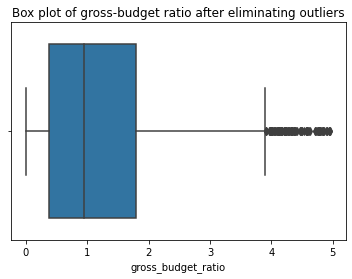

In [249]:
sns.boxplot(df_cut["gross_budget_ratio"])
plt.title("Box plot of gross-budget ratio after eliminating outliers")

In [250]:
y3[y3==1].shape, normed_X_cut[y3==1].shape

((1647,), (1647, 27))

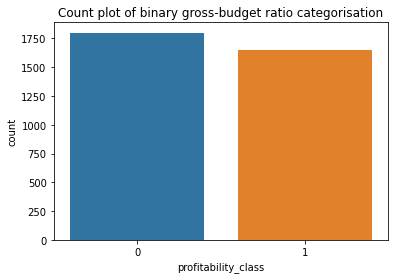

In [251]:
sns.countplot(y3)
plt.title("Count plot of binary gross-budget ratio categorisation")
plt.show()

In [225]:
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

In [226]:
num_classes = 2

model4 = tfk.Sequential([
#     tfkl.Dense(128, activation="sigmoid"),
    tfkl.Dense(64, activation="sigmoid", input_shape=[X_train.shape[1]],
               kernel_regularizer=tfk.regularizers.l2(1e-4)),
    tfkl.Dropout(0.3),
    tfkl.Dense(32, activation="sigmoid",
              kernel_regularizer=tfk.regularizers.l2(1e-4)),
    tfkl.Dropout(0.3),
    tfkl.Dense(num_classes, activation="softmax")
])

model4.compile(optimizer=tfk.optimizers.Adam(1e-2),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy', tfk.metrics.Recall()])
model4.fit(X_train.values, y_train, validation_split=0.33, 
           epochs=500, batch_size=128, use_multiprocessing=True, workers=10)

Train on 1384 samples, validate on 683 samples
Epoch 1/500
1384/1384 [==============================] - 1s 723us/sample - loss: 0.7453 - accuracy: 0.5246 - recall_5: 0.5246 - val_loss: 0.6903 - val_accuracy: 0.5622 - val_recall_5: 0.5622
Epoch 2/500
1384/1384 [==============================] - 0s 47us/sample - loss: 0.7074 - accuracy: 0.5513 - recall_5: 0.5513 - val_loss: 0.6882 - val_accuracy: 0.5754 - val_recall_5: 0.5754
Epoch 3/500
1384/1384 [==============================] - 0s 47us/sample - loss: 0.6837 - accuracy: 0.5773 - recall_5: 0.5773 - val_loss: 0.6886 - val_accuracy: 0.5710 - val_recall_5: 0.5710
Epoch 4/500
1384/1384 [==============================] - 0s 48us/sample - loss: 0.6865 - accuracy: 0.5860 - recall_5: 0.5860 - val_loss: 0.6833 - val_accuracy: 0.5739 - val_recall_5: 0.5739
Epoch 5/500
1384/1384 [==============================] - 0s 47us/sample - loss: 0.6769 - accuracy: 0.5730 - recall_5: 0.5730 - val_loss: 0.6853 - val_accuracy: 0.5827 - val_recall_5: 0.5827
Ep

Epoch 44/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.6612 - accuracy: 0.6236 - recall_5: 0.6236 - val_loss: 0.6777 - val_accuracy: 0.6018 - val_recall_5: 0.6018
Epoch 45/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.6627 - accuracy: 0.6134 - recall_5: 0.6134 - val_loss: 0.6834 - val_accuracy: 0.6032 - val_recall_5: 0.6032
Epoch 46/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.6609 - accuracy: 0.6134 - recall_5: 0.6134 - val_loss: 0.6809 - val_accuracy: 0.6032 - val_recall_5: 0.6032
Epoch 47/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6614 - accuracy: 0.6091 - recall_5: 0.6091 - val_loss: 0.6798 - val_accuracy: 0.6105 - val_recall_5: 0.6105
Epoch 48/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6579 - accuracy: 0.6243 - recall_5: 0.6243 - val_loss: 0.6836 - val_accuracy: 0.6061 - val_recall_5: 0.6061
Epoch 49/500
1384/1384 [=====================

Epoch 87/500
1384/1384 [==============================] - 0s 42us/sample - loss: 0.6575 - accuracy: 0.6171 - recall_5: 0.6171 - val_loss: 0.6891 - val_accuracy: 0.6105 - val_recall_5: 0.6105
Epoch 88/500
1384/1384 [==============================] - 0s 38us/sample - loss: 0.6468 - accuracy: 0.6272 - recall_5: 0.6272 - val_loss: 0.6874 - val_accuracy: 0.6164 - val_recall_5: 0.6164
Epoch 89/500
1384/1384 [==============================] - 0s 40us/sample - loss: 0.6559 - accuracy: 0.6134 - recall_5: 0.6134 - val_loss: 0.6851 - val_accuracy: 0.6149 - val_recall_5: 0.6149
Epoch 90/500
1384/1384 [==============================] - 0s 45us/sample - loss: 0.6502 - accuracy: 0.6077 - recall_5: 0.6077 - val_loss: 0.6896 - val_accuracy: 0.6237 - val_recall_5: 0.6237
Epoch 91/500
1384/1384 [==============================] - 0s 61us/sample - loss: 0.6545 - accuracy: 0.6142 - recall_5: 0.6142 - val_loss: 0.6852 - val_accuracy: 0.6179 - val_recall_5: 0.6179
Epoch 92/500
1384/1384 [=====================

Epoch 130/500
1384/1384 [==============================] - 0s 33us/sample - loss: 0.6406 - accuracy: 0.6423 - recall_5: 0.6423 - val_loss: 0.6950 - val_accuracy: 0.6266 - val_recall_5: 0.6266
Epoch 131/500
1384/1384 [==============================] - 0s 34us/sample - loss: 0.6512 - accuracy: 0.6301 - recall_5: 0.6301 - val_loss: 0.6934 - val_accuracy: 0.6266 - val_recall_5: 0.6266
Epoch 132/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6531 - accuracy: 0.6272 - recall_5: 0.6272 - val_loss: 0.6962 - val_accuracy: 0.6266 - val_recall_5: 0.6266
Epoch 133/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.6485 - accuracy: 0.6293 - recall_5: 0.6293 - val_loss: 0.6941 - val_accuracy: 0.6266 - val_recall_5: 0.6266
Epoch 134/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.6466 - accuracy: 0.6329 - recall_5: 0.6329 - val_loss: 0.6926 - val_accuracy: 0.6340 - val_recall_5: 0.6340
Epoch 135/500
1384/1384 [===============

Epoch 173/500
1384/1384 [==============================] - 0s 47us/sample - loss: 0.6365 - accuracy: 0.6423 - recall_5: 0.6423 - val_loss: 0.7089 - val_accuracy: 0.6281 - val_recall_5: 0.6281
Epoch 174/500
1384/1384 [==============================] - 0s 38us/sample - loss: 0.6368 - accuracy: 0.6445 - recall_5: 0.6445 - val_loss: 0.7121 - val_accuracy: 0.6281 - val_recall_5: 0.6281
Epoch 175/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.6351 - accuracy: 0.6423 - recall_5: 0.6423 - val_loss: 0.7073 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 176/500
1384/1384 [==============================] - 0s 36us/sample - loss: 0.6377 - accuracy: 0.6488 - recall_5: 0.6488 - val_loss: 0.7040 - val_accuracy: 0.6281 - val_recall_5: 0.6281
Epoch 177/500
1384/1384 [==============================] - 0s 35us/sample - loss: 0.6334 - accuracy: 0.6496 - recall_5: 0.6496 - val_loss: 0.7047 - val_accuracy: 0.6237 - val_recall_5: 0.6237
Epoch 178/500
1384/1384 [===============

Epoch 216/500
1384/1384 [==============================] - 0s 48us/sample - loss: 0.6272 - accuracy: 0.6633 - recall_5: 0.6633 - val_loss: 0.7223 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 217/500
1384/1384 [==============================] - 0s 53us/sample - loss: 0.6316 - accuracy: 0.6712 - recall_5: 0.6712 - val_loss: 0.7246 - val_accuracy: 0.6266 - val_recall_5: 0.6266
Epoch 218/500
1384/1384 [==============================] - 0s 64us/sample - loss: 0.6279 - accuracy: 0.6720 - recall_5: 0.6720 - val_loss: 0.7300 - val_accuracy: 0.6252 - val_recall_5: 0.6252
Epoch 219/500
1384/1384 [==============================] - 0s 53us/sample - loss: 0.6339 - accuracy: 0.6684 - recall_5: 0.6684 - val_loss: 0.7214 - val_accuracy: 0.6047 - val_recall_5: 0.6047
Epoch 220/500
1384/1384 [==============================] - 0s 43us/sample - loss: 0.6374 - accuracy: 0.6676 - recall_5: 0.6676 - val_loss: 0.7325 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 221/500
1384/1384 [===============

Epoch 259/500
1384/1384 [==============================] - 0s 33us/sample - loss: 0.6008 - accuracy: 0.6980 - recall_5: 0.6980 - val_loss: 0.7576 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 260/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.6154 - accuracy: 0.7038 - recall_5: 0.7038 - val_loss: 0.7574 - val_accuracy: 0.6047 - val_recall_5: 0.6047
Epoch 261/500
1384/1384 [==============================] - 0s 34us/sample - loss: 0.6206 - accuracy: 0.6900 - recall_5: 0.6900 - val_loss: 0.7529 - val_accuracy: 0.6354 - val_recall_5: 0.6354
Epoch 262/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.6162 - accuracy: 0.6900 - recall_5: 0.6900 - val_loss: 0.7408 - val_accuracy: 0.6179 - val_recall_5: 0.6179
Epoch 263/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.6229 - accuracy: 0.6842 - recall_5: 0.6842 - val_loss: 0.7513 - val_accuracy: 0.6237 - val_recall_5: 0.6237
Epoch 264/500
1384/1384 [===============

Epoch 302/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.6166 - accuracy: 0.6871 - recall_5: 0.6871 - val_loss: 0.7660 - val_accuracy: 0.6120 - val_recall_5: 0.6120
Epoch 303/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6074 - accuracy: 0.7045 - recall_5: 0.7045 - val_loss: 0.7685 - val_accuracy: 0.6003 - val_recall_5: 0.6003
Epoch 304/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.6111 - accuracy: 0.7059 - recall_5: 0.7059 - val_loss: 0.7707 - val_accuracy: 0.6193 - val_recall_5: 0.6193
Epoch 305/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.6081 - accuracy: 0.7052 - recall_5: 0.7052 - val_loss: 0.7547 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 306/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6143 - accuracy: 0.6994 - recall_5: 0.6994 - val_loss: 0.7674 - val_accuracy: 0.6223 - val_recall_5: 0.6223
Epoch 307/500
1384/1384 [===============

Epoch 345/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.6058 - accuracy: 0.7030 - recall_5: 0.7030 - val_loss: 0.7840 - val_accuracy: 0.6193 - val_recall_5: 0.6193
Epoch 346/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6053 - accuracy: 0.7052 - recall_5: 0.7052 - val_loss: 0.7898 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 347/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.6083 - accuracy: 0.6958 - recall_5: 0.6958 - val_loss: 0.7860 - val_accuracy: 0.6179 - val_recall_5: 0.6179
Epoch 348/500
1384/1384 [==============================] - 0s 32us/sample - loss: 0.6095 - accuracy: 0.7045 - recall_5: 0.7045 - val_loss: 0.7926 - val_accuracy: 0.6018 - val_recall_5: 0.6018
Epoch 349/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.6059 - accuracy: 0.6994 - recall_5: 0.6994 - val_loss: 0.7787 - val_accuracy: 0.6149 - val_recall_5: 0.6149
Epoch 350/500
1384/1384 [===============

Epoch 388/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.6084 - accuracy: 0.7146 - recall_5: 0.7146 - val_loss: 0.7942 - val_accuracy: 0.6105 - val_recall_5: 0.6105
Epoch 389/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5982 - accuracy: 0.7066 - recall_5: 0.7066 - val_loss: 0.7950 - val_accuracy: 0.6061 - val_recall_5: 0.6061
Epoch 390/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.6040 - accuracy: 0.7290 - recall_5: 0.7290 - val_loss: 0.7965 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 391/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5880 - accuracy: 0.7225 - recall_5: 0.7225 - val_loss: 0.8018 - val_accuracy: 0.6091 - val_recall_5: 0.6091
Epoch 392/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.5877 - accuracy: 0.7225 - recall_5: 0.7225 - val_loss: 0.8172 - val_accuracy: 0.6193 - val_recall_5: 0.6193
Epoch 393/500
1384/1384 [===============

1384/1384 [==============================] - 0s 28us/sample - loss: 0.5960 - accuracy: 0.7327 - recall_5: 0.7327 - val_loss: 0.8264 - val_accuracy: 0.6076 - val_recall_5: 0.6076
Epoch 431/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5983 - accuracy: 0.7262 - recall_5: 0.7262 - val_loss: 0.8228 - val_accuracy: 0.6164 - val_recall_5: 0.6164
Epoch 432/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.5926 - accuracy: 0.7305 - recall_5: 0.7305 - val_loss: 0.8111 - val_accuracy: 0.6061 - val_recall_5: 0.6061
Epoch 433/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.5971 - accuracy: 0.7298 - recall_5: 0.7298 - val_loss: 0.8291 - val_accuracy: 0.5930 - val_recall_5: 0.5930
Epoch 434/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5784 - accuracy: 0.7225 - recall_5: 0.7225 - val_loss: 0.8271 - val_accuracy: 0.6149 - val_recall_5: 0.6149
Epoch 435/500
1384/1384 [=============================

Epoch 473/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.5736 - accuracy: 0.7457 - recall_5: 0.7457 - val_loss: 0.8338 - val_accuracy: 0.6208 - val_recall_5: 0.6208
Epoch 474/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.5908 - accuracy: 0.7319 - recall_5: 0.7319 - val_loss: 0.8399 - val_accuracy: 0.6149 - val_recall_5: 0.6149
Epoch 475/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.6056 - accuracy: 0.7182 - recall_5: 0.7182 - val_loss: 0.8264 - val_accuracy: 0.6193 - val_recall_5: 0.6193
Epoch 476/500
1384/1384 [==============================] - 0s 30us/sample - loss: 0.5812 - accuracy: 0.7370 - recall_5: 0.7370 - val_loss: 0.8361 - val_accuracy: 0.6120 - val_recall_5: 0.6120
Epoch 477/500
1384/1384 [==============================] - 0s 29us/sample - loss: 0.5789 - accuracy: 0.7334 - recall_5: 0.7334 - val_loss: 0.8364 - val_accuracy: 0.6091 - val_recall_5: 0.6091
Epoch 478/500
1384/1384 [===============

In [227]:
model4.evaluate(np.array(X_train), y_train, verbose=2)
model4.evaluate(np.array(X_test), y_test, verbose=2, batch_size=128)

2067/2067 - 0s - loss: 0.6160 - accuracy: 0.7397 - recall_5: 0.7397
1379/1379 - 0s - loss: 0.8479 - accuracy: 0.5830 - recall_5: 0.5830


[0.8478865676638525, 0.5830312, 0.5830312]

In [228]:
preds4 = model4.predict(np.array(X_test))

In [229]:
preds4 # each row represents the probablities that this instance falls into one of the 3 classes 

array([[0.46899122, 0.5310087 ],
       [0.87330735, 0.12669264],
       [0.45732215, 0.5426779 ],
       ...,
       [0.45406526, 0.54593474],
       [0.09540209, 0.90459794],
       [0.58744353, 0.4125564 ]], dtype=float32)

In [230]:
preds4_concrete = np.argmax(preds4, axis=1)
preds4_concrete

array([1, 0, 1, ..., 1, 1, 0])

In [231]:
from sklearn.metrics import confusion_matrix, classification_report

In [232]:
print(classification_report(preds4_concrete, np.argmax(y_test, 1)))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       677
           1       0.60      0.53      0.56       702

    accuracy                           0.58      1379
   macro avg       0.58      0.58      0.58      1379
weighted avg       0.59      0.58      0.58      1379



##### 3.3.2 3 classes

In [252]:
def classify_ratio_3c(ratio):
    if ratio < 1:
        return 0
    elif (ratio > 1) and (ratio < 2):
        return 1
    else:
        return 2

In [253]:
df_cut["profitability_class"] = df_cut["gross_budget_ratio"].apply(lambda x : classify_ratio_3c(x))
y3 = df_cut["profitability_class"].reset_index(drop=True)

#y3_encoded = tfk.utils.to_categorical(y3)

X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y3, test_size=0.4, random_state=42)

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


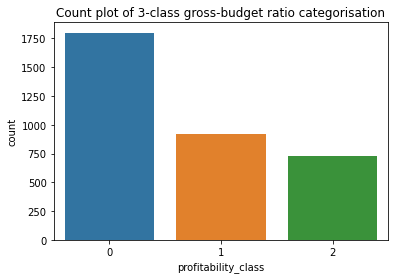

In [254]:
sns.countplot(y3)
plt.title("Count plot of 3-class gross-budget ratio categorisation")
plt.show()

In [236]:
class_0_features = X_train[y_train == 0]
class_0_labels = y_train[y_train == 0]

class_1_features = X_train[y_train == 1].values
class_2_features = X_train[y_train == 2].values
class_1_labels = y_train[y_train == 1].values
class_2_labels = y_train[y_train == 2].values


ids = np.arange(len(class_1_features))
choices = np.random.choice(ids, class_0_features.shape[0])

res_class_1_features = class_1_features[choices]
res_class_1_labels = class_1_labels[choices]

ids = np.arange(len(class_2_features))
choices = np.random.choice(ids, class_0_features.shape[0])

res_class_2_features = class_2_features[choices]
res_class_2_labels = class_2_labels[choices]

resampled_X = np.concatenate([class_0_features.values, res_class_1_features, res_class_2_features])
resampled_y = np.concatenate([class_0_labels, res_class_1_labels, res_class_2_labels])

order = np.arange(len(resampled_y))
np.random.shuffle(order)
resampled_X = resampled_X[order]
resampled_y = resampled_y[order]
resampled_y_encoded = tfk.utils.to_categorical(resampled_y)

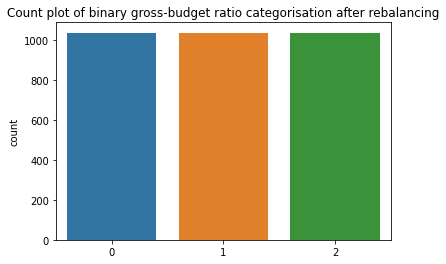

In [255]:
sns.countplot(resampled_y)
plt.title("Count plot of binary gross-budget ratio categorisation after rebalancing")
plt.show()

In [238]:
# class_0, class_1 = np.bincount(df_cut["profitability_class"])
# total = class_0 + class_1 

# weight_for_0 = (1 / class_0)*(total)/2.0 
# weight_for_1 = (1 / class_1)*(total)/2.0
# # weight_for_2 = (1 / class_2)*(total)/3.0

# class_weight = {0: weight_for_0, 1: weight_for_1}

# print('Weight for class 0: {:.2f}'.format(weight_for_0))
# print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [239]:
num_classes = 3
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

model5 = tfk.Sequential([
#     tfkl.Dense(128, activation="sigmoid"),
#     tfkl.Dense(64, activation="sigmoid", input_shape=[X_train.shape[1]],
#                kernel_regularizer=tfk.regularizers.l2(1e-4)),
#     tfkl.Dropout(0.3),
    tfkl.Dense(32, activation="sigmoid",
              kernel_regularizer=tfk.regularizers.l2(1e-4)
              ),
    tfkl.Dropout(0.3),
    tfkl.Dense(num_classes, activation="softmax")
])

model5.compile(optimizer=tfk.optimizers.Adam(1e-2),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy', tfk.metrics.Recall()])
model5.fit(np.array(X_train), y_train, validation_split=0.33, 
           epochs=500, batch_size=128, use_multiprocessing=True, workers=10)

Train on 1384 samples, validate on 683 samples
Epoch 1/500
1384/1384 [==============================] - 1s 531us/sample - loss: 1.1112 - accuracy: 0.4480 - recall_6: 0.2991 - val_loss: 1.0269 - val_accuracy: 0.4993 - val_recall_6: 0.3163
Epoch 2/500
1384/1384 [==============================] - 0s 38us/sample - loss: 1.0374 - accuracy: 0.4942 - recall_6: 0.3186 - val_loss: 1.0387 - val_accuracy: 0.4963 - val_recall_6: 0.3851
Epoch 3/500
1384/1384 [==============================] - 0s 35us/sample - loss: 1.0315 - accuracy: 0.5007 - recall_6: 0.3439 - val_loss: 1.0202 - val_accuracy: 0.5037 - val_recall_6: 0.2914
Epoch 4/500
1384/1384 [==============================] - 0s 33us/sample - loss: 1.0288 - accuracy: 0.4942 - recall_6: 0.3020 - val_loss: 1.0223 - val_accuracy: 0.5168 - val_recall_6: 0.3675
Epoch 5/500
1384/1384 [==============================] - 0s 33us/sample - loss: 1.0165 - accuracy: 0.5116 - recall_6: 0.3338 - val_loss: 1.0228 - val_accuracy: 0.5037 - val_recall_6: 0.3192
Ep

Epoch 44/500
1384/1384 [==============================] - 0s 35us/sample - loss: 0.9797 - accuracy: 0.5340 - recall_6: 0.3223 - val_loss: 1.0237 - val_accuracy: 0.5183 - val_recall_6: 0.3543
Epoch 45/500
1384/1384 [==============================] - 0s 34us/sample - loss: 0.9843 - accuracy: 0.5253 - recall_6: 0.3627 - val_loss: 1.0238 - val_accuracy: 0.5022 - val_recall_6: 0.3104
Epoch 46/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.9781 - accuracy: 0.5376 - recall_6: 0.2695 - val_loss: 1.0236 - val_accuracy: 0.5198 - val_recall_6: 0.3441
Epoch 47/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.9731 - accuracy: 0.5289 - recall_6: 0.3786 - val_loss: 1.0246 - val_accuracy: 0.5110 - val_recall_6: 0.3485
Epoch 48/500
1384/1384 [==============================] - 0s 31us/sample - loss: 0.9763 - accuracy: 0.5361 - recall_6: 0.3280 - val_loss: 1.0207 - val_accuracy: 0.5037 - val_recall_6: 0.3104
Epoch 49/500
1384/1384 [=====================

Epoch 87/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.9642 - accuracy: 0.5542 - recall_6: 0.3815 - val_loss: 1.0302 - val_accuracy: 0.5154 - val_recall_6: 0.3660
Epoch 88/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.9445 - accuracy: 0.5643 - recall_6: 0.3699 - val_loss: 1.0318 - val_accuracy: 0.5139 - val_recall_6: 0.3719
Epoch 89/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.9507 - accuracy: 0.5672 - recall_6: 0.3786 - val_loss: 1.0295 - val_accuracy: 0.5124 - val_recall_6: 0.3646
Epoch 90/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.9581 - accuracy: 0.5542 - recall_6: 0.3786 - val_loss: 1.0303 - val_accuracy: 0.5212 - val_recall_6: 0.3602
Epoch 91/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.9648 - accuracy: 0.5441 - recall_6: 0.3822 - val_loss: 1.0343 - val_accuracy: 0.5198 - val_recall_6: 0.3675
Epoch 92/500
1384/1384 [=====================

Epoch 130/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.9407 - accuracy: 0.5708 - recall_6: 0.4249 - val_loss: 1.0565 - val_accuracy: 0.5183 - val_recall_6: 0.3836
Epoch 131/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.9484 - accuracy: 0.5665 - recall_6: 0.4061 - val_loss: 1.0548 - val_accuracy: 0.5066 - val_recall_6: 0.3411
Epoch 132/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.9336 - accuracy: 0.5802 - recall_6: 0.4046 - val_loss: 1.0516 - val_accuracy: 0.5124 - val_recall_6: 0.3734
Epoch 133/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.9320 - accuracy: 0.5723 - recall_6: 0.4082 - val_loss: 1.0507 - val_accuracy: 0.5198 - val_recall_6: 0.3704
Epoch 134/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.9281 - accuracy: 0.5809 - recall_6: 0.4357 - val_loss: 1.0555 - val_accuracy: 0.5168 - val_recall_6: 0.3748
Epoch 135/500
1384/1384 [===============

Epoch 173/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.9326 - accuracy: 0.5802 - recall_6: 0.4292 - val_loss: 1.0778 - val_accuracy: 0.4993 - val_recall_6: 0.3851
Epoch 174/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.9285 - accuracy: 0.5715 - recall_6: 0.4364 - val_loss: 1.0746 - val_accuracy: 0.4978 - val_recall_6: 0.3807
Epoch 175/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.9142 - accuracy: 0.5903 - recall_6: 0.4494 - val_loss: 1.0722 - val_accuracy: 0.4905 - val_recall_6: 0.3748
Epoch 176/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.9295 - accuracy: 0.5708 - recall_6: 0.4371 - val_loss: 1.0742 - val_accuracy: 0.4993 - val_recall_6: 0.3836
Epoch 177/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.9070 - accuracy: 0.5975 - recall_6: 0.4523 - val_loss: 1.0735 - val_accuracy: 0.4934 - val_recall_6: 0.3807
Epoch 178/500
1384/1384 [===============

Epoch 216/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8940 - accuracy: 0.5997 - recall_6: 0.4798 - val_loss: 1.0933 - val_accuracy: 0.5022 - val_recall_6: 0.3704
Epoch 217/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8984 - accuracy: 0.6004 - recall_6: 0.4733 - val_loss: 1.0986 - val_accuracy: 0.5051 - val_recall_6: 0.3851
Epoch 218/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.9006 - accuracy: 0.6004 - recall_6: 0.4776 - val_loss: 1.0983 - val_accuracy: 0.5022 - val_recall_6: 0.3953
Epoch 219/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.8924 - accuracy: 0.5997 - recall_6: 0.4718 - val_loss: 1.0996 - val_accuracy: 0.5022 - val_recall_6: 0.3953
Epoch 220/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8886 - accuracy: 0.5947 - recall_6: 0.4754 - val_loss: 1.1023 - val_accuracy: 0.5051 - val_recall_6: 0.3982
Epoch 221/500
1384/1384 [===============

Epoch 259/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.9022 - accuracy: 0.5860 - recall_6: 0.4834 - val_loss: 1.1103 - val_accuracy: 0.4934 - val_recall_6: 0.4012
Epoch 260/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.8782 - accuracy: 0.6264 - recall_6: 0.4935 - val_loss: 1.1136 - val_accuracy: 0.4963 - val_recall_6: 0.3924
Epoch 261/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.8723 - accuracy: 0.6149 - recall_6: 0.4971 - val_loss: 1.1133 - val_accuracy: 0.5022 - val_recall_6: 0.3968
Epoch 262/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.8918 - accuracy: 0.6113 - recall_6: 0.5036 - val_loss: 1.1090 - val_accuracy: 0.4978 - val_recall_6: 0.4041
Epoch 263/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8862 - accuracy: 0.6127 - recall_6: 0.4949 - val_loss: 1.1086 - val_accuracy: 0.4934 - val_recall_6: 0.4129
Epoch 264/500
1384/1384 [===============

Epoch 302/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8755 - accuracy: 0.6243 - recall_6: 0.4971 - val_loss: 1.1263 - val_accuracy: 0.4949 - val_recall_6: 0.4070
Epoch 303/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.8821 - accuracy: 0.6236 - recall_6: 0.5166 - val_loss: 1.1305 - val_accuracy: 0.4993 - val_recall_6: 0.4012
Epoch 304/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.8902 - accuracy: 0.6084 - recall_6: 0.4892 - val_loss: 1.1231 - val_accuracy: 0.5022 - val_recall_6: 0.3997
Epoch 305/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.8796 - accuracy: 0.6142 - recall_6: 0.5036 - val_loss: 1.1238 - val_accuracy: 0.4949 - val_recall_6: 0.4129
Epoch 306/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.8575 - accuracy: 0.6257 - recall_6: 0.5202 - val_loss: 1.1268 - val_accuracy: 0.4963 - val_recall_6: 0.3997
Epoch 307/500
1384/1384 [===============

Epoch 345/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8735 - accuracy: 0.6243 - recall_6: 0.5087 - val_loss: 1.1502 - val_accuracy: 0.5095 - val_recall_6: 0.4173
Epoch 346/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.8452 - accuracy: 0.6344 - recall_6: 0.5253 - val_loss: 1.1500 - val_accuracy: 0.5051 - val_recall_6: 0.4085
Epoch 347/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.8649 - accuracy: 0.6178 - recall_6: 0.5145 - val_loss: 1.1445 - val_accuracy: 0.4905 - val_recall_6: 0.3982
Epoch 348/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.8773 - accuracy: 0.6156 - recall_6: 0.5022 - val_loss: 1.1454 - val_accuracy: 0.4993 - val_recall_6: 0.3982
Epoch 349/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.8745 - accuracy: 0.6134 - recall_6: 0.5152 - val_loss: 1.1519 - val_accuracy: 0.4963 - val_recall_6: 0.4187
Epoch 350/500
1384/1384 [===============

Epoch 388/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8552 - accuracy: 0.6301 - recall_6: 0.5166 - val_loss: 1.1623 - val_accuracy: 0.4993 - val_recall_6: 0.4100
Epoch 389/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.8632 - accuracy: 0.6228 - recall_6: 0.5224 - val_loss: 1.1648 - val_accuracy: 0.4993 - val_recall_6: 0.4246
Epoch 390/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8415 - accuracy: 0.6344 - recall_6: 0.5188 - val_loss: 1.1627 - val_accuracy: 0.4905 - val_recall_6: 0.4143
Epoch 391/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8645 - accuracy: 0.6214 - recall_6: 0.5188 - val_loss: 1.1657 - val_accuracy: 0.5007 - val_recall_6: 0.4290
Epoch 392/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8576 - accuracy: 0.6351 - recall_6: 0.5311 - val_loss: 1.1630 - val_accuracy: 0.4978 - val_recall_6: 0.4202
Epoch 393/500
1384/1384 [===============

Epoch 431/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8530 - accuracy: 0.6366 - recall_6: 0.5137 - val_loss: 1.1662 - val_accuracy: 0.5037 - val_recall_6: 0.4334
Epoch 432/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8559 - accuracy: 0.6387 - recall_6: 0.5231 - val_loss: 1.1762 - val_accuracy: 0.4963 - val_recall_6: 0.4129
Epoch 433/500
1384/1384 [==============================] - 0s 28us/sample - loss: 0.8678 - accuracy: 0.6250 - recall_6: 0.5065 - val_loss: 1.1734 - val_accuracy: 0.4978 - val_recall_6: 0.4114
Epoch 434/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8608 - accuracy: 0.6221 - recall_6: 0.5123 - val_loss: 1.1762 - val_accuracy: 0.5007 - val_recall_6: 0.4275
Epoch 435/500
1384/1384 [==============================] - 0s 27us/sample - loss: 0.8522 - accuracy: 0.6503 - recall_6: 0.5318 - val_loss: 1.1750 - val_accuracy: 0.4963 - val_recall_6: 0.4173
Epoch 436/500
1384/1384 [===============

Epoch 474/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8461 - accuracy: 0.6308 - recall_6: 0.5325 - val_loss: 1.1832 - val_accuracy: 0.5051 - val_recall_6: 0.4202
Epoch 475/500
1384/1384 [==============================] - 0s 23us/sample - loss: 0.8538 - accuracy: 0.6243 - recall_6: 0.5231 - val_loss: 1.1833 - val_accuracy: 0.5051 - val_recall_6: 0.4056
Epoch 476/500
1384/1384 [==============================] - 0s 24us/sample - loss: 0.8535 - accuracy: 0.6134 - recall_6: 0.5101 - val_loss: 1.1873 - val_accuracy: 0.4978 - val_recall_6: 0.4187
Epoch 477/500
1384/1384 [==============================] - 0s 25us/sample - loss: 0.8583 - accuracy: 0.6301 - recall_6: 0.5303 - val_loss: 1.1922 - val_accuracy: 0.4949 - val_recall_6: 0.4275
Epoch 478/500
1384/1384 [==============================] - 0s 26us/sample - loss: 0.8367 - accuracy: 0.6322 - recall_6: 0.5282 - val_loss: 1.1869 - val_accuracy: 0.5007 - val_recall_6: 0.4275
Epoch 479/500
1384/1384 [===============

In [240]:
model5.evaluate(np.array(X_train), y_train, verbose=2)
model5.evaluate(np.array(X_test), y_test, verbose=2, batch_size=128)

2067/2067 - 0s - loss: 0.8968 - accuracy: 0.6401 - recall_6: 0.5254
1379/1379 - 0s - loss: 1.0858 - accuracy: 0.5315 - recall_6: 0.4155


[1.0857553373997932, 0.5315446, 0.4155185]